In [ ]:
import xgboost as xgb
import pandas as pd

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
X_train = pd.read_csv("dataSplits/X_train.csv")
y_train = pd.read_csv("dataSplits/y_train.csv").squeeze()  # to convert DataFrame -> Series
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [16]:
# Import regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X_test = pd.read_csv("dataSplits/X_test.csv")
y_test = pd.read_csv("dataSplits/y_test.csv").squeeze()  # to convert DataFrame -> Series

#Predict the target variable (Global_Sales) using the test set
y_pred = xgb_model.predict(X_test)

#Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

#Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Calculate R² Score (explained variance; closer to 1 means better fit)
r2 = r2_score(y_test, y_pred)

#Print the results with 4 decimal places
print(f"MAE:  {mae:.4f}")   
print(f"RMSE: {rmse:.4f}")  
print(f"R²:   {r2:.4f}")    

MAE:  0.0327
RMSE: 0.1690
R²:   0.9860


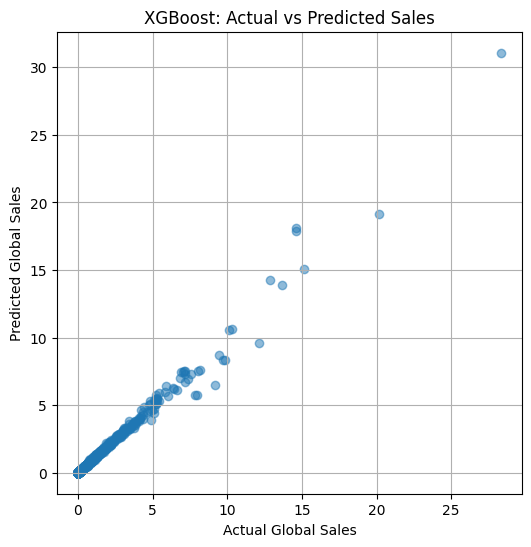

In [17]:
#Visualize predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("XGBoost: Actual vs Predicted Sales")
plt.grid(True)
plt.show()


In [14]:
#Save the trained model

import joblib

joblib.dump(xgb_model, "xgb_best_model.pkl")
print("XGBoost model saved successfully.")


XGBoost model saved successfully.
